In [1]:
from lifelines.datasets import load_waltons

In [14]:
# T是持续时间数组，E是布尔数组或二进制数组，表示是否观察到“死亡”
df = load_waltons()
df

,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137
5,19.0,1,miR-137
6,19.0,1,miR-137
7,26.0,1,miR-137
8,26.0,1,miR-137
9,26.0,1,miR-137


In [15]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
T = df['T']
E = df['E']
kmf.fit(T, E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 163 total observations, 7 right-censored observations>

In [16]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
6.0,0.993865
7.0,0.987730
9.0,0.969210
13.0,0.950690
15.0,0.938344
17.0,0.932170
19.0,0.913650
22.0,0.888957


In [17]:
kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
6.0,0.006135
7.0,0.012270
9.0,0.030790
13.0,0.049310
15.0,0.061656
17.0,0.067830
19.0,0.086350
22.0,0.111043


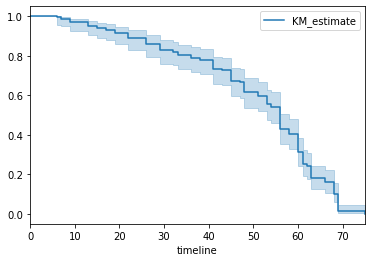

In [18]:
kmf.plot_survival_function()

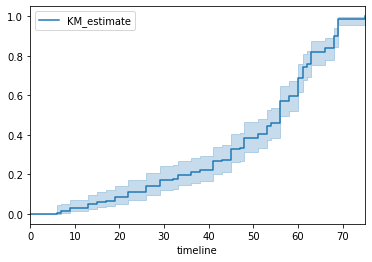

In [19]:
kmf.plot_cumulative_density()

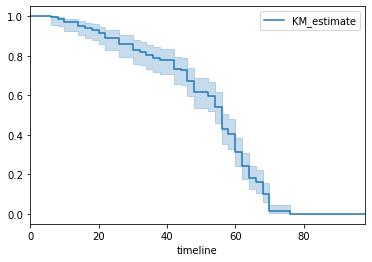

In [21]:
kmf.fit(T, E, timeline=range(0, 100, 2))
kmf.plot()

In [27]:
# 有用的摘要统计数据是中位生存时间，它表示何时有50％的人口死亡：
from lifelines.utils import median_survival_times
import matplotlib.pyplot as plt
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
display(median_)
median_confidence_interval_ 

56.0

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.5,54.0,58.0


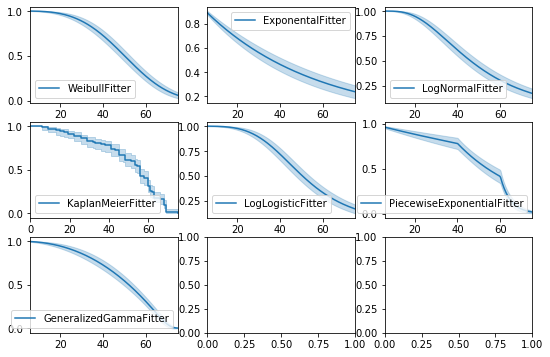

In [34]:
from lifelines import *
fig, axes = plt.subplots(3, 3, figsize=(9, 6))

kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter')
wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
exf = ExponentialFitter().fit(T, E, label='ExponentalFitter')
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
pwf = PiecewiseExponentialFitter([40, 60]).fit(T, E, label='PiecewiseExponentialFitter')
ggf = GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter')

wbf.plot_survival_function(ax=axes[0][0])
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
pwf.plot_survival_function(ax=axes[1][2])
ggf.plot_survival_function(ax=axes[2][0])

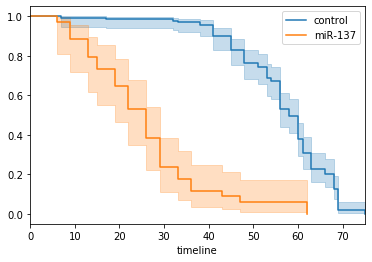

In [35]:
# 多组
groups = df['group']
ix = (groups == 'miR-137')

kmf.fit(T[~ix], E[~ix], label='control')
ax = kmf.plot()

kmf.fit(T[ix], E[ix], label='miR-137')
ax = kmf.plot(ax=ax)

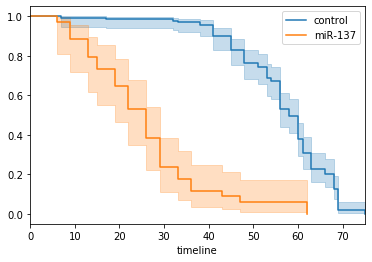

In [38]:
ax = plt.subplot(111)

kmf = KaplanMeierFitter()

for name, grouped_df in df.groupby('group'):
    kmf.fit(grouped_df["T"], grouped_df["E"], label=name)
    kmf.plot(ax=ax)

In [42]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(T, event_observed=E)
naf.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
6.0,0.006135
7.0,0.012308
9.0,0.031176
13.0,0.050408
15.0,0.063437
17.0,0.070016
19.0,0.090017
22.0,0.117322


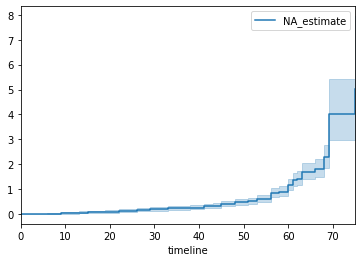

In [46]:
naf.plot()

Observed lifetimes at time 10:
 [ 2.75626019 10.          1.1691484   1.51652761 10.          0.11890483
  0.06711703  2.39665926 10.         10.         10.          1.37103245
  8.54327302 10.          2.77215655  0.57883111  0.94145903  2.13146561
  1.29758813  2.07368277 10.          5.05369089  3.40457423  0.20844389
  9.37473921]


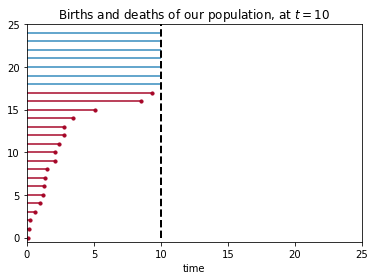

In [63]:
from lifelines.plotting import plot_lifetimes
import numpy as np
from numpy.random import uniform, exponential

N = 25

CURRENT_TIME = 10

actual_lifetimes = np.array([
    exponential(12) if (uniform() < 0.5) else exponential(2) for i in range(N)
])
observed_lifetimes = np.minimum(actual_lifetimes, CURRENT_TIME)
death_observed = actual_lifetimes < CURRENT_TIME

ax = plot_lifetimes(observed_lifetimes, event_observed=death_observed)

ax.set_xlim(0, 25)
ax.vlines(10, 0, 30, lw=2, linestyles='--')
ax.set_xlabel("time")
ax.set_title("Births and deaths of our population, at $t=10$")
print("Observed lifetimes at time %d:\n" % (CURRENT_TIME), observed_lifetimes)

(0, 25)

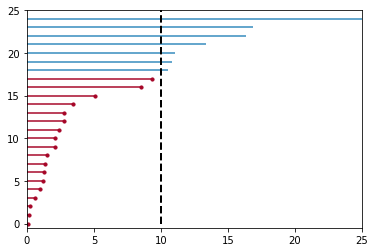

In [64]:
ax = plot_lifetimes(actual_lifetimes, event_observed=death_observed)
ax.vlines(10, 0, 30, lw=2, linestyles='--')
ax.set_xlim(0, 25)

In [1]:
from lifelines.datasets import load_dd
data=load_dd()
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [2]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
T = data["duration"]
E = data["observed"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1808 total observations, 340 right-censored observations>

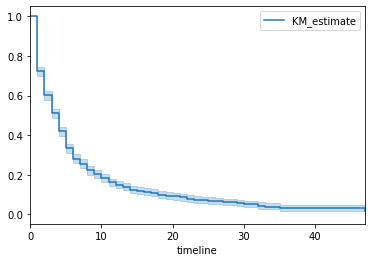

In [3]:
kmf.plot()

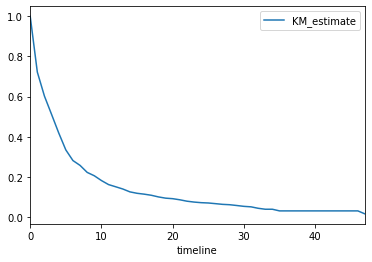

In [4]:
kmf.survival_function_.plot()

In [5]:
from lifelines.utils import median_survival_times
median_ci = median_survival_times(kmf.confidence_interval_)
median_ci

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.5,3.0,4.0


In [ ]:
# 生存回归 --Cox模型
# 我们将协变量（例如年龄，国家/地区等）与另一个变量进行回归-在这种情况下为持续时间
# 生存回归所需的数据集必须采用Pandas DataFrame格式

In [8]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

rossi_dataset = load_rossi()
rossi_dataset

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
5,52,0,0,24,1,1,0,0,2
6,23,1,0,25,1,1,1,1,0
7,52,0,1,21,1,1,0,1,4
8,52,0,0,22,1,0,0,0,6
9,52,0,0,20,1,1,0,0,0


In [ ]:
# 统计比较两个总体
# 研究人员经常想比较不同人群之间的生存能力。这里有一些技巧可以做到这一点：
# 时序检验logrank_test
# 当比例危险假设为真时，对数秩检验具有最大功效。结果，如果生存函数交叉，则对数秩检验将对差异进行不准确的评估。

In [9]:
from lifelines.statistics import logrank_test


results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
results.print_summary()

NameError: name 'T1' is not defined

In [15]:
import numpy as np
import pandas as pd
from lifelines.statistics import multivariate_logrank_test

df = pd.DataFrame({
    'durations': [5, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
    'groups': [0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2], # could be strings too
    'events': [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
})

results = multivariate_logrank_test(df['durations'], df['groups'], df['events'])
results.print_summary()


In [16]:
import os
import sys
import numpy as np
import pandas as pd
import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torch.utils.data.sampler import *
print('torch version:', torch.__version__)

ModuleNotFoundError: No module named 'cv2'

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torch.utils.data.sampler import *
print('torch version:', torch.__version__)



# setup external file ############################################################
#local
if 0:
    MYFILE_DIR = '/root/share/project/kaggle/2019/steel/code/dummy_semi_17/kernel/efficientb5_mish_256x400crop'
    DATA_DIR   = '/root/share/project/kaggle/2019/steel/data'
    CHECKPOINT_FILE     = '/root/share/project/kaggle/2019/steel/result100/efficientb5-mish-fpn-crop256x400-semi-foldb1-1/checkpoint/00097000_model.pth'
    SUBMISSION_CSV_FILE = '/root/share/project/kaggle/2019/steel/result100/efficientb5-mish-fpn-crop256x400-semi-foldb1-1/kernel-submission.csv'


#kaggle
if 1:
    MYFILE_DIR  = '../input'
    DATA_DIR    = '../input/severstal-steel-defect-detection'
    SUBMISSION_CSV_FILE = 'submission.csv'
    CHECKPOINT_FILE     = '../input/myfile05/00097000_model.pth'


#copyfile(src = '../input/steel2019/efficientnet.py', dst = '../working/efficientnet.py')
sys.path.append(MYFILE_DIR)
from myfile05.efficientnet import *
from myfile05.helper import *
import warnings
warnings.filterwarnings('ignore')


#### net #########################################################################
class ConvGnUp2d(nn.Module):
    def __init__(self, in_channel, out_channel, num_group=32, kernel_size=3, padding=1, stride=1):
        super(ConvGnUp2d, self).__init__()
        self.conv = nn.Conv2d(in_channel, out_channel, kernel_size=kernel_size, padding=padding, stride=stride, bias=False)
        self.gn   = nn.GroupNorm(num_group,out_channel)

    def forward(self,x):
        x = self.conv(x)
        x = self.gn(x)
        x = F.relu(x, inplace=True)
        x = F.interpolate(x, scale_factor=2, mode='bilinear', align_corners=False)
        return x

def upsize_add(x, lateral):
    return F.interpolate(x, size=lateral.shape[2:], mode='nearest') + lateral

def upsize(x, scale_factor=2):
    x = F.interpolate(x, scale_factor=scale_factor, mode='nearest')
    return x


class Net(nn.Module):

    def __init__(self, num_class=4, drop_connect_rate=0.2):
        super(Net, self).__init__()

        e = EfficientNetB5(drop_connect_rate)
        self.stem   = e.stem
        self.block1 = e.block1
        self.block2 = e.block2
        self.block3 = e.block3
        self.block4 = e.block4
        self.block5 = e.block5
        self.block6 = e.block6
        self.block7 = e.block7
        self.last   = e.last
        e = None  #dropped

        #---
        self.lateral0 = nn.Conv2d(2048, 64,  kernel_size=1, padding=0, stride=1)
        self.lateral1 = nn.Conv2d( 176, 64,  kernel_size=1, padding=0, stride=1)
        self.lateral2 = nn.Conv2d(  64, 64,  kernel_size=1, padding=0, stride=1)
        self.lateral3 = nn.Conv2d(  40, 64,  kernel_size=1, padding=0, stride=1)

        self.top1 = nn.Sequential(
            ConvGnUp2d( 64, 64),
            ConvGnUp2d( 64, 64),
            ConvGnUp2d( 64, 64),
        )
        self.top2 = nn.Sequential(
            ConvGnUp2d( 64, 64),
            ConvGnUp2d( 64, 64),
        )
        self.top3 = nn.Sequential(
            ConvGnUp2d( 64, 64),
        )
        self.top4 = nn.Sequential(
            nn.Conv2d(64*3, 64, kernel_size=3, stride=1, padding=1, bias=False),
            BatchNorm2d(64),
            nn.ReLU(inplace=True),
        )
        self.logit_mask = nn.Conv2d(64,num_class+1,kernel_size=1)

    def forward(self, x):
        batch_size,C,H,W = x.shape

        x = self.stem(x)            #; print('stem  ',x.shape)
        x = self.block1(x)    ;x0=x #; print('block1',x.shape)
        x = self.block2(x)    ;x1=x #; print('block2',x.shape)
        x = self.block3(x)    ;x2=x #; print('block3',x.shape)
        x = self.block4(x)          #; print('block4',x.shape)
        x = self.block5(x)    ;x3=x #; print('block5',x.shape)
        x = self.block6(x)          #; print('block6',x.shape)
        x = self.block7(x)          #; print('block7',x.shape)
        x = self.last(x)      ;x4=x #; print('last  ',x.shape)

        # segment
        t0 = self.lateral0(x4)
        t1 = upsize_add(t0, self.lateral1(x3)) #16x16
        t2 = upsize_add(t1, self.lateral2(x2)) #32x32
        t3 = upsize_add(t2, self.lateral3(x1)) #64x64

        t1 = self.top1(t1) #128x128
        t2 = self.top2(t2) #128x128
        t3 = self.top3(t3) #128x128

        t = torch.cat([t1,t2,t3],1)
        t = self.top4(t)
        logit_mask = self.logit_mask(t)
        logit_mask = F.interpolate(logit_mask, scale_factor=2.0, mode='bilinear', align_corners=False)

        return logit_mask


def probability_mask_to_probability_label(probability):
    probability = F.adaptive_max_pool2d(probability,1).squeeze(-1).squeeze(-1)
    return probability


#### data #########################################################################

def image_to_input(image):
    input = image.astype(np.float32)
    input = input[...,::-1]/255
    input = input.transpose(0,3,1,2)
    # input[:,0] = (input[:,0]-IMAGE_RGB_MEAN[0])/IMAGE_RGB_STD[0]
    # input[:,1] = (input[:,1]-IMAGE_RGB_MEAN[1])/IMAGE_RGB_STD[1]
    # input[:,2] = (input[:,2]-IMAGE_RGB_MEAN[2])/IMAGE_RGB_STD[2]
    return input


class KaggleTestDataset(Dataset):
    def __init__(self):

        df =  pd.read_csv(DATA_DIR + '/sample_submission.csv')
        df['ImageId'] = df['ImageId_ClassId'].apply(lambda x: x.split('_')[0])
        self.uid = df['ImageId'].unique().tolist()

    def __str__(self):
        string  = ''
        string += '\tlen = %d\n'%len(self)
        return string

    def __len__(self):
        return len(self.uid)

    def __getitem__(self, index):
        # print(index)
        image_id = self.uid[index]
        image = cv2.imread(DATA_DIR + '/test_images/%s'%(image_id), cv2.IMREAD_COLOR)
        return image, image_id


def null_collate(batch):
    batch_size = len(batch)
    input = []
    image_id = []
    for b in range(batch_size):
        input.append(batch[b][0])
        image_id.append(batch[b][1])
    input = np.stack(input)
    input = torch.from_numpy(image_to_input(input))
    return input, image_id



### kaggle ##############################################################
def post_process(mask, min_size):
    num_component, component = cv2.connectedComponents(mask.astype(np.uint8))

    predict = np.zeros((256, 1600), np.float32)
    for c in range(1, num_component):
        p = (component == c)
        if p.sum() > min_size:
            predict[p] = 1

    return predict


#https://www.kaggle.com/bigkizd/se-resnext50-89
def run_length_encode(mask):
    m = mask.T.flatten()
    if m.sum()==0:
        rle=''
    else:
        m   = np.concatenate([[0], m, [0]])
        run = np.where(m[1:] != m[:-1])[0] + 1
        run[1::2] -= run[::2]
        rle = ' '.join(str(r) for r in run)
    return rle



#########################################################################

def run_check_setup():

    ## load net
    net = Net().cuda()
    net.load_state_dict(torch.load(CHECKPOINT_FILE, map_location=lambda storage, loc: storage),strict=True)

    ## load data
    image_id = ['004f40c73.jpg', '006f39c41.jpg', '00b7fb703.jpg', '00bbcd9af.jpg']
    image=[]
    for i in image_id:
        m = cv2.imread(DATA_DIR +'/test_images/%s'%i)
        image.append(m)
    image = np.stack(image)
    input = image_to_input(image)
    input = torch.from_numpy(input).cuda()

    #run here!
    net.eval()
    with torch.no_grad():
        logit = net(input)
        probability= torch.sigmoid(logit)

    print('input: ',input.shape)
    print('logit: ',logit.shape)
    print('')
    #---
    input = input.data.cpu().numpy()
    logit = logit.data.cpu().numpy()

    if 1:
        print(logit[0,0,:5,:5],'\n')
        print(logit[3,0,-5:,-5:],'\n')
        print(logit.mean(),logit.std(),logit.max(),logit.min(),'\n')
        print('')
        print('---------------------')
        print('')


'''
        
torch version: 1.2.0
input:  torch.Size([4, 3, 256, 1600])
logit:  torch.Size([4, 5, 256, 1600])

[[4.2859354 4.3712254 4.541806  4.673983  4.767757 ]
 [4.237069  4.339175  4.5433893 4.6927257 4.7871857]
 [4.1393356 4.275076  4.5465555 4.7302113 4.826044 ]
 [4.1033278 4.252742  4.551571  4.747407  4.840251 ]
 [4.1290436 4.272175  4.558437  4.744314  4.8298078]] 

[[4.306243  4.1898646 4.0734544 3.9570115 3.89879  ]
 [4.2352004 4.117502  4.000481  3.8841367 3.8259642]
 [4.1956406 4.080703  3.9746747 3.877556  3.8289967]
 [4.187563  4.079467  3.9960358 3.93727   3.9078872]
 [4.183524  4.078849  4.0067163 3.9671268 3.9473324]] 

-0.02721289 3.712041 9.195948 -5.5987377 
 
'''


########################################################################

def run_make_submission_csv():

    threshold_label      = [ 0.80, 0.90, 0.75, 0.60,]
    threshold_mask_pixel = [ 0.40, 0.40, 0.40, 0.40,]
    threshold_mask_size  = [   40,   40,   40,   40,]

    ## load net
    print('load net ...')
    net = Net().cuda()
    net.load_state_dict(torch.load(CHECKPOINT_FILE, map_location=lambda storage, loc: storage),strict=True)
    print('')


    ## load data
    print('load data ...')
    dataset = KaggleTestDataset()
    print(dataset)
    #exit(0)

    loader  = DataLoader(
        dataset,
        sampler     = SequentialSampler(dataset),
        batch_size  = 4,
        drop_last   = False,
        num_workers = 4,
        pin_memory  = True,
        collate_fn  = null_collate
    )


    ## start here ----------------------------------
    image_id_class_id = []
    encoded_pixel     = []


    net.eval()

    start_timer = timer()
    for t,(input, image_id) in enumerate(loader):
        if t%10==300: #200
            print('\r loader: t = %4d / %4d  %s  %s : %s'%(
                  t, len(loader)-1, str(input.shape), image_id[0], time_to_str((timer() - start_timer),'sec'),
            ),end='', flush=True)

        with torch.no_grad():
            input = input.cuda()

            if 1: # 'null' in augment:
                logit = net(input) #data_parallel(net,input)  #net(input)
                probability = torch.softmax(logit,1)

                probability_mask  = probability[:,1:] #just drop background
                probability_label = probability_mask_to_probability_label(probability)[:,1:]
                num_augment =1

            if 1 : #'flip_lr' in augment:
                logit = net(torch.flip(input,dims=[3]))
                probability  = torch.softmax(torch.flip(logit,dims=[3]),1)

                probability_mask  += probability[:,1:] #just drop background
                probability_label += probability_mask_to_probability_label(probability)[:,1:]
                num_augment +=1

            if 1 : #'flip_ud' in augment:
                logit = net(torch.flip(input,dims=[2]))
                probability = torch.softmax(torch.flip(logit,dims=[2]),1)

                probability_mask  += probability[:,1:] #just drop background
                probability_label += probability_mask_to_probability_label(probability)[:,1:]
                num_augment +=1

            #---
            probability_mask  = probability_mask/num_augment
            probability_label = probability_label/num_augment


        probability_mask  = probability_mask.data.cpu().numpy()
        probability_label = probability_label.data.cpu().numpy()


        batch_size = len(image_id)
        for b in range(batch_size):
            for c in range(4):
                rle=''

                predict_label = probability_label[b,c]>threshold_label[c]
                if predict_label:
                    try:
                        predict_mask = probability_mask[b,c] > threshold_mask_pixel[c]
                        predict_mask = post_process(predict_mask, threshold_mask_size[c])
                        rle = run_length_encode(predict_mask)

                    except:
                        print('An exception occurred : %s'%(image_id[b]+'_%d'%(c+1)))


                image_id_class_id.append(image_id[b]+'_%d'%(c+1))
                encoded_pixel.append(rle)


    print('\r loader: t = %4d / %4d  %s  %s : %s'%(
          t, len(loader)-1, str(input.shape), image_id[0], time_to_str((timer() - start_timer),'sec'),
    ),end='', flush=True)
    print('\n')


    df = pd.DataFrame(zip(image_id_class_id, encoded_pixel), columns=['ImageId_ClassId', 'EncodedPixels'])
    df.to_csv(SUBMISSION_CSV_FILE, index=False)


    ## print statistics ----
    if 1:
        text = summarise_submission_csv(df)
        print(text)

'''

compare with LB probing ... 


    threshold_label      = [ 0.75, 0.85, 0.50, 0.50,]
    threshold_mask_pixel = [ 0.45, 0.45, 0.40, 0.40,]
    threshold_mask_size  = [   40,   40,   40,   40,]
    
		num_image =  1801(1801) 
		num  =  7204(7204) 

		pos1 =    96( 128)  0.750
		pos2 =     7(  43)  0.163
		pos3 =   590( 741)  0.796
		pos4 =   114( 120)  0.950

		neg1 =  1705(1673)  1.019   32
		neg2 =  1794(1758)  1.020   36
		neg3 =  1211(1060)  1.142  151
		neg4 =  1687(1681)  1.004    6
--------------------------------------------------
		neg  =  6397(6172)  1.036  225 
'''

# main #################################################################
if __name__ == '__main__':
    #run_check_setup()
    run_make_submission_csv()

    print('\nsucess!')
